In [1]:
# Download the dataset (skip if already downloaded)
!wget -nc https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz

# Unzip the dataset (force overwrite if needed)
!gzip -d -f HIGGS.csv.gz


--2025-06-19 17:05:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/00280/HIGGS.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘HIGGS.csv.gz’

HIGGS.csv.gz            [             <=>    ]   2.62G  21.3MB/s    in 3m 28s  

2025-06-19 17:09:14 (12.9 MB/s) - ‘HIGGS.csv.gz’ saved [2816407858]

^C


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)


In [4]:
# Load first 10,000 rows for fast checking (change None to load full dataset)
data = pd.read_csv('HIGGS.csv.gz', header=None, nrows=10000)

# Print first 5 rows
print(data.head())


    0         1         2         3         4         5         6         7   \
0  1.0  0.869293 -0.635082  0.225690  0.327470 -0.689993  0.754202 -0.248573   
1  1.0  0.907542  0.329147  0.359412  1.497970 -0.313010  1.095531 -0.557525   
2  1.0  0.798835  1.470639 -1.635975  0.453773  0.425629  1.104875  1.282322   
3  0.0  1.344385 -0.876626  0.935913  1.992050  0.882454  1.786066 -1.646778   
4  1.0  1.105009  0.321356  1.522401  0.882808 -1.205349  0.681466 -1.070464   

         8         9   ...        19        20        21        22        23  \
0 -1.092064  0.000000  ... -0.010455 -0.045767  3.101961  1.353760  0.979563   
1 -1.588230  2.173076  ... -1.138930 -0.000819  0.000000  0.302220  0.833048   
2  1.381664  0.000000  ...  1.128848  0.900461  0.000000  0.909753  1.108330   
3 -0.942383  0.000000  ... -0.678379 -1.360356  0.000000  0.946652  1.028704   
4 -0.921871  0.000000  ... -0.373566  0.113041  0.000000  0.755856  1.361057   

         24        25        26       

In [5]:
columns = [
    'target',
    'lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy', 'missing_phi',
    'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag',
    'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag',
    'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag',
    'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag',
    'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'
]

data.columns = columns
print(data.head())


   target  lepton_pT  lepton_eta  lepton_phi  missing_energy  missing_phi  \
0     1.0   0.869293   -0.635082    0.225690        0.327470    -0.689993   
1     1.0   0.907542    0.329147    0.359412        1.497970    -0.313010   
2     1.0   0.798835    1.470639   -1.635975        0.453773     0.425629   
3     0.0   1.344385   -0.876626    0.935913        1.992050     0.882454   
4     1.0   1.105009    0.321356    1.522401        0.882808    -1.205349   

    jet1_pt  jet1_eta  jet1_phi  jet1_btag  ...  jet4_eta  jet4_phi  \
0  0.754202 -0.248573 -1.092064   0.000000  ... -0.010455 -0.045767   
1  1.095531 -0.557525 -1.588230   2.173076  ... -1.138930 -0.000819   
2  1.104875  1.282322  1.381664   0.000000  ...  1.128848  0.900461   
3  1.786066 -1.646778 -0.942383   0.000000  ... -0.678379 -1.360356   
4  0.681466 -1.070464 -0.921871   0.000000  ... -0.373566  0.113041   

   jet4_btag      m_jj     m_jjj      m_lv     m_jlv      m_bb     m_wbb  \
0   3.101961  1.353760  0.979563  

In [6]:
X = data.iloc[:, 1:]  # features (all except 'target')
y = data['target']    # labels (signal or background)


In [7]:
# First split into train + temp (val + test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split train_val into training and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")


Train size: 6000, Validation size: 2000, Test size: 2000


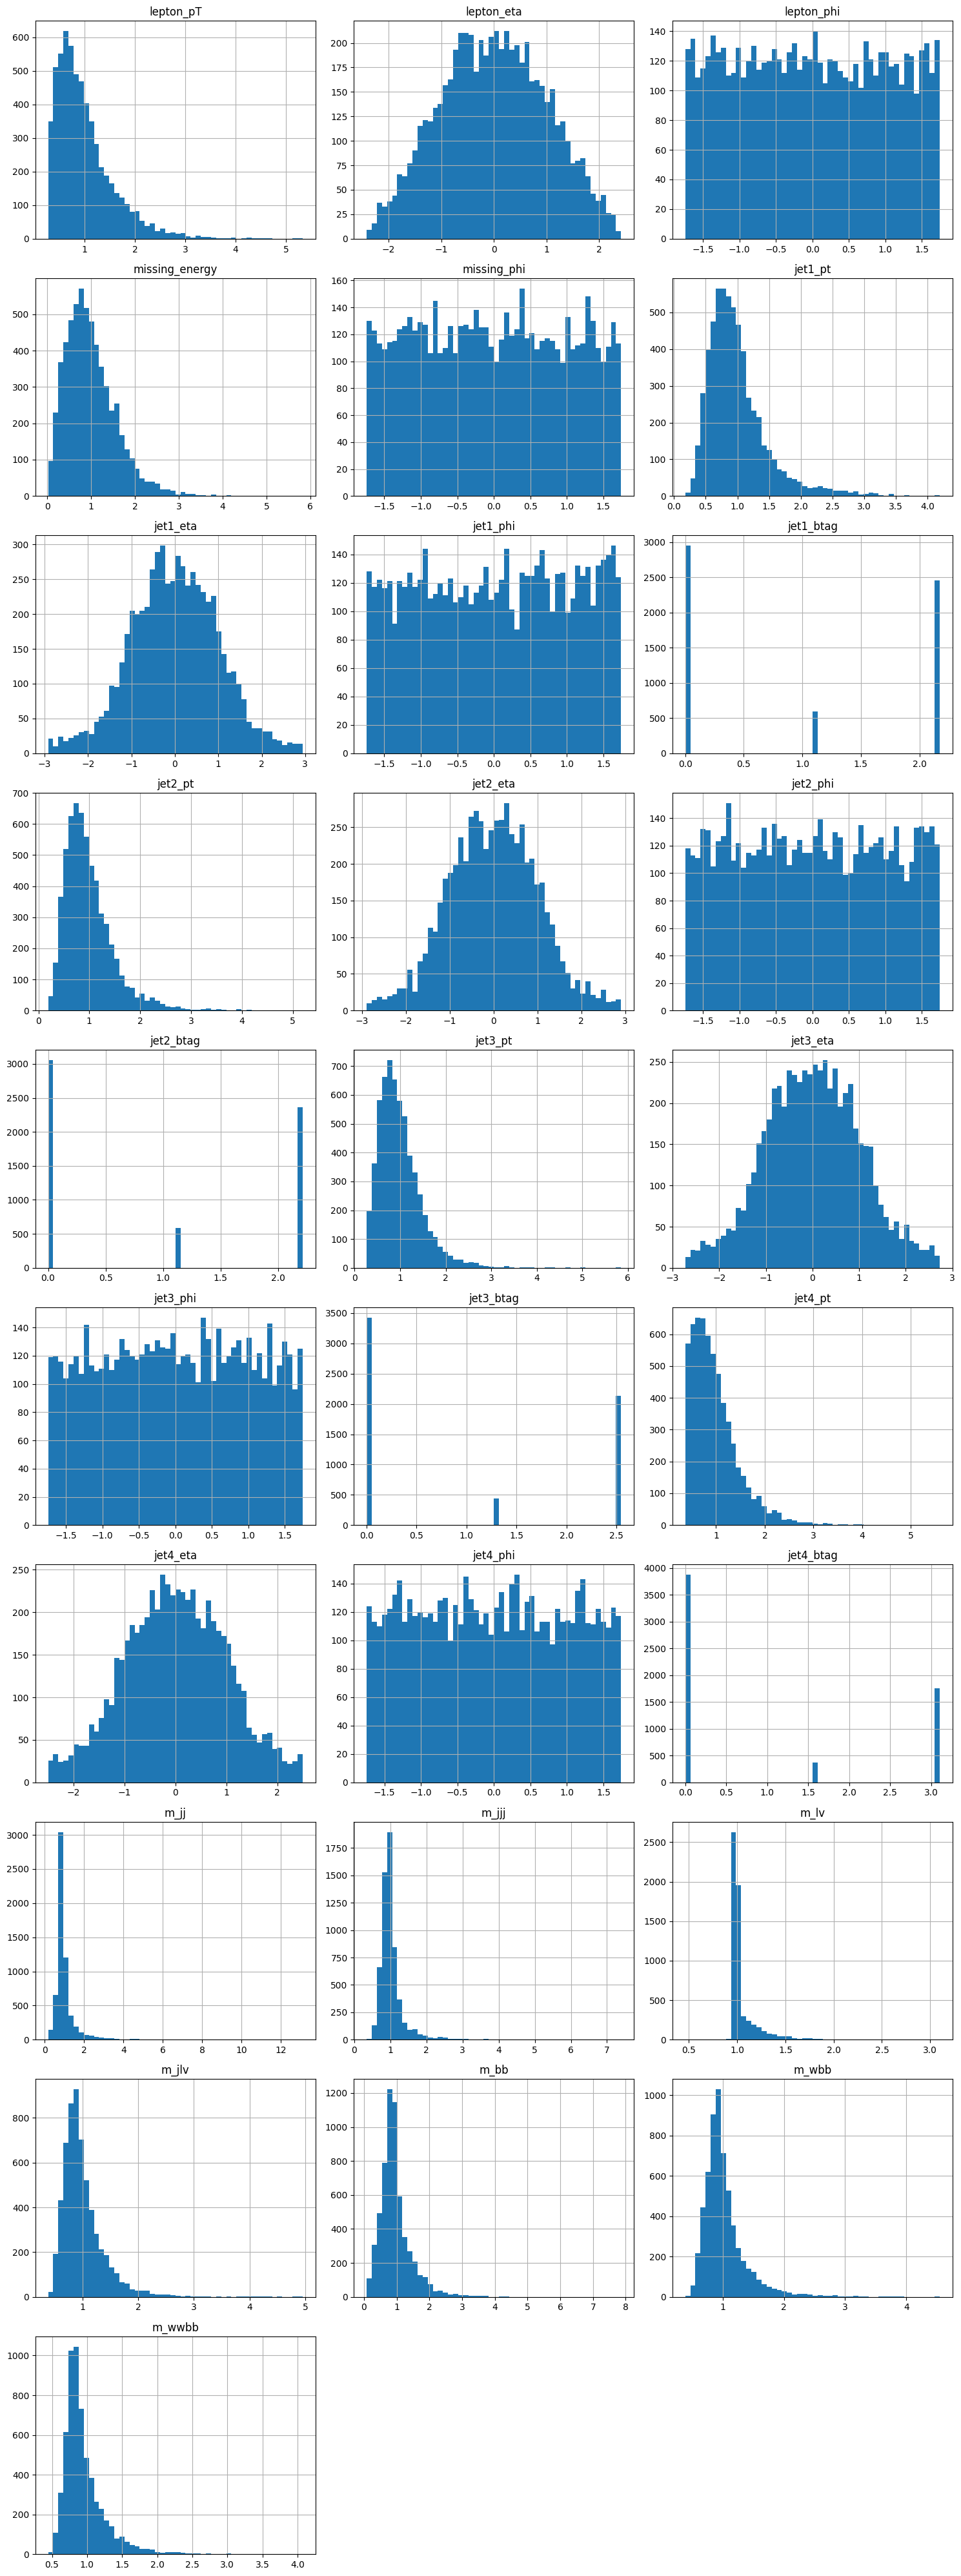

In [8]:
num_cols = 3
num_rows = len(X_train.columns) // num_cols + (len(X_train.columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

for i, col in enumerate(X_train.columns):
    ax = axes.flatten()[i]
    X_train[col].hist(bins=50, ax=ax)
    ax.set_title(col)

# Hide unused subplots
for j in range(i+1, num_rows*num_cols):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()


<Figure size 1200x1200 with 0 Axes>

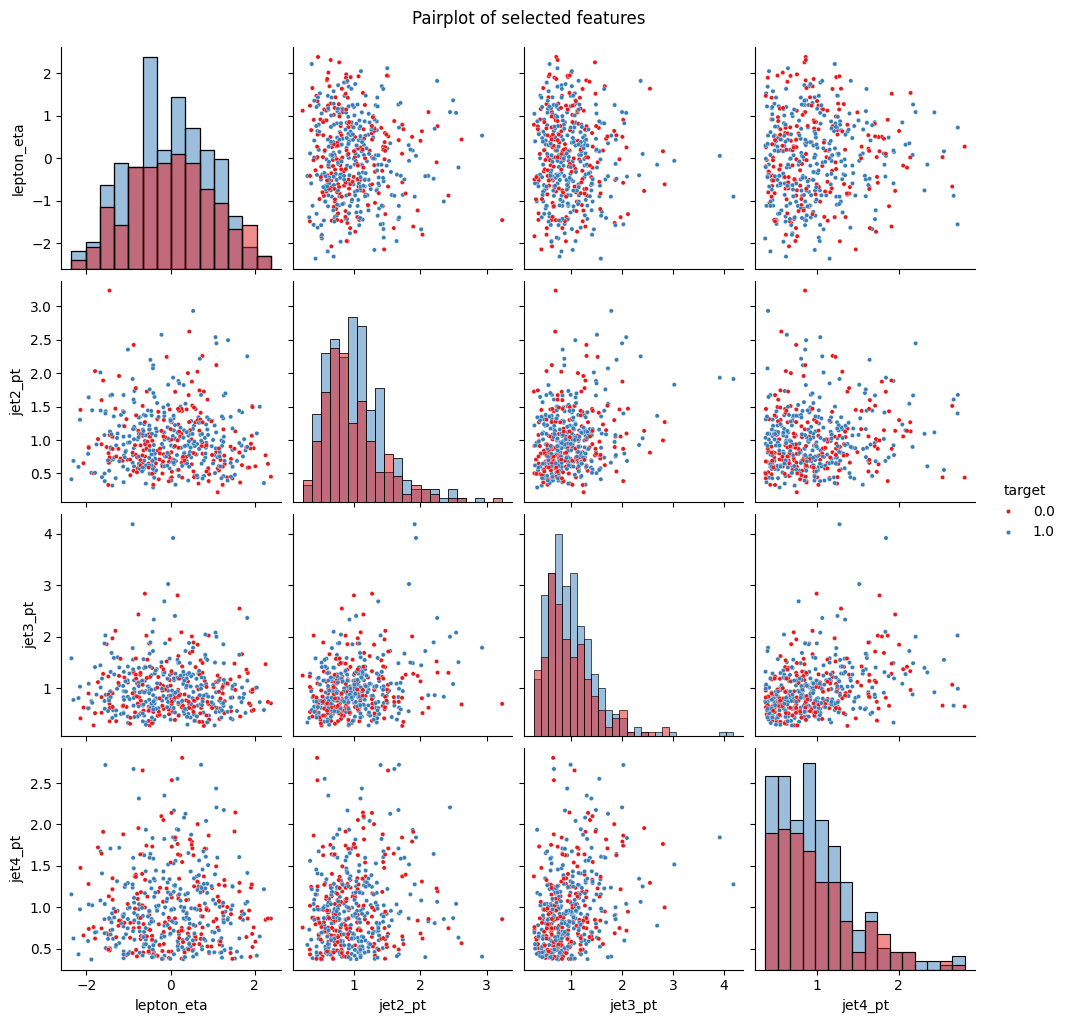

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select some features for the pairplot (to avoid long rendering times)
selected_columns = [
    'target',
    'lepton_eta',
    'jet2_pt',
    'jet3_pt',
    'jet4_pt'
]

# Use only the first 500 rows to speed things up
pairplot_data = data[selected_columns].iloc[:500]

plt.figure(figsize=(8, 8), dpi=150)
sns.pairplot(
    pairplot_data,
    hue="target",
    palette="Set1",
    diag_kind="hist",
    plot_kws={"s": 10}  # smaller dot size
)
plt.suptitle("Pairplot of selected features", y=1.02)
plt.show()

In [11]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# Define the XGBoost model
classifier = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit the model
classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

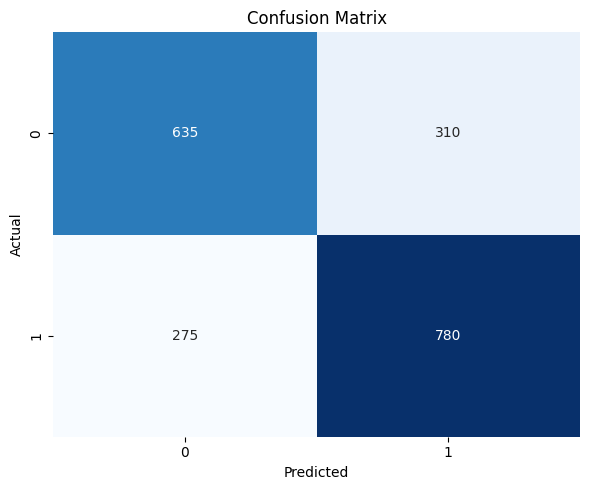

Accuracy  : 0.7075
Precision : 0.7156
Recall    : 0.7393
F1 Score  : 0.7273


In [12]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score
)

# Predict test set
predictions = classifier.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Evaluation metrics
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1 Score  : {f1:.4f}")


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define simple neural net
class HiggsNet(nn.Module):
    def __init__(self, input_dim):
        super(HiggsNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = HiggsNet(X_train.shape[1])
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = loss_fn(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")


Epoch 1/10, Loss: 64.8572
Epoch 2/10, Loss: 63.9584
Epoch 3/10, Loss: 62.4245
Epoch 4/10, Loss: 61.0166
Epoch 5/10, Loss: 59.9513
Epoch 6/10, Loss: 59.2399
Epoch 7/10, Loss: 58.6747
Epoch 8/10, Loss: 58.5008
Epoch 9/10, Loss: 57.9421
Epoch 10/10, Loss: 57.2879


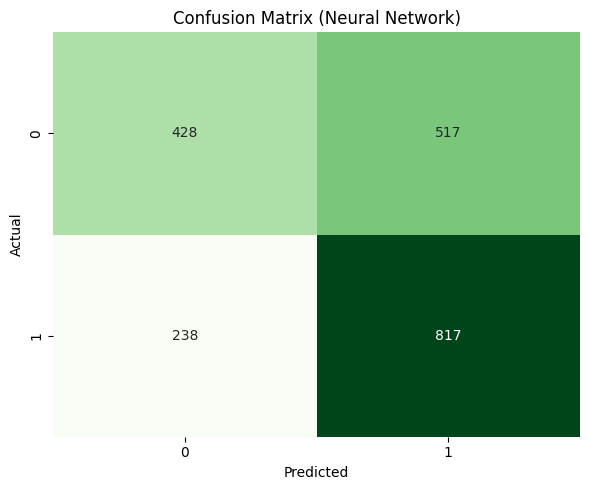

Neural Net Accuracy  : 0.6225
Neural Net Precision : 0.6124
Neural Net Recall    : 0.7744
Neural Net F1 Score  : 0.6840


In [14]:
# Predict on test set
model.eval()
with torch.no_grad():
    y_pred_proba = model(X_test_tensor).numpy()
    y_pred_nn = (y_pred_proba > 0.5).astype(int)

# Confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Network)')
plt.tight_layout()
plt.show()

# Metrics
acc_nn = accuracy_score(y_test, y_pred_nn)
prec_nn = precision_score(y_test, y_pred_nn)
rec_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print(f"Neural Net Accuracy  : {acc_nn:.4f}")
print(f"Neural Net Precision : {prec_nn:.4f}")
print(f"Neural Net Recall    : {rec_nn:.4f}")
print(f"Neural Net F1 Score  : {f1_nn:.4f}")


In [15]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [16]:
!git clone https://github.com/SharmilaNanditamhc/assignment.git


Cloning into 'assignment'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 104 (delta 6), reused 4 (delta 4), pack-reused 93 (from 1)
Receiving objects: 100% (104/104), 585.30 KiB | 14.63 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [17]:
!mv higgs_analysis.ipynb assignment/


mv: cannot stat 'higgs_analysis.ipynb': No such file or directory
